In [4]:
# Conditional Routing
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [11]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    final_result: int

def add_node(state: AgentState) -> AgentState:
    """Use this node to add two numbers"""
    state['final_result'] = state["number1"] + state["number2"]
    return state

def sub_node(state: AgentState) -> AgentState:
    """Use this node to subtract two numbers"""
    state["final_result"] = state["number1"] - state["number2"]
    return state

def decision_node(state: AgentState):
    """This is the decision node"""
    if(state["operation"] == "+"):
        return "addition_node"
    elif(state["operation"] == "-"):
        return "subtraction_node"
    


In [12]:
graph = StateGraph(AgentState)
graph.add_node("add_node", add_node)
graph.add_node("sub_node", sub_node)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_node": "add_node",
        "subtraction_node": "sub_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)
app = graph.compile()

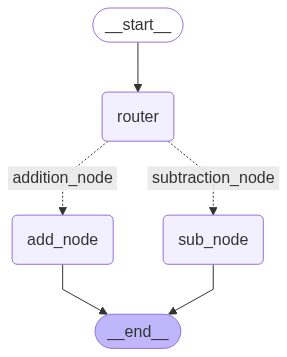

In [13]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke({
    "number1": 5,
    "number2": 3,
    "operation": "-"
})

print(result)

{'number1': 5, 'number2': 3, 'operation': '-', 'final_result': 2}
